In [1]:
import os
import pandas as pd
import glob

In [2]:
# create path to json files
path_to_json = "Task\Retweet Network\Event"
json_pattern = os.path.join(path_to_json, "*.json")
file_list = glob.glob(json_pattern)
# read json files into dataframes
dfs = []
for file in file_list:
    data = pd.read_json(file, orient="index")
    # store dataframes in a list
    dfs.append(data)
# concatenate all dataframes
df = pd.concat(dfs, ignore_index=True)

In [3]:
df.head()

,is_retweet,retweeted_from_sn,retweeted_from_id,retweeted_tweetid,full_text,text,tweet_id,screen_name,name,user_lang,...,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,is_language_code,possibly_sensitive,media_num,photo,video,animated_gif
0,True,ZiaNabavi1,9.898017e+17,1.122823e+18,شما می‌توانید مخالف نظرات #مهناز_افشار باشید و...,RT @ZiaNabavi1: شما می‌توانید مخالف نظرات #مهن...,1124032931171852288,daneshzade,محمدرضا دال,en,...,NaN,None,None,None,fa,False,0,0,0,0
1,False,NaN,NaN,NaN,#سید_مرتضی_آوینی\n#طلبه_همدانی https://t.co/KJ...,#سید_مرتضی_آوینی\n#طلبه_همدانی https://t.co/KJ...,1124031785510342656,AN8HBsJHf9SycyK,انتظار,fa,...,NaN,None,None,None,und,False,0,0,0,0
2,True,smvaziri,8.007359e+17,1.124030e+18,السلام عليك يا ابا‌عبد‌لله\nبه نيابت از شهيد #...,RT @smvaziri: السلام عليك يا ابا‌عبد‌لله\nبه ن...,1124030541437767680,amin_rt07,™[ΛMIՈ],fa,...,NaN,None,None,None,ar,False,0,0,0,0
3,False,NaN,NaN,NaN,السلام عليك يا ابا‌عبد‌لله\nبه نيابت از شهيد #...,السلام عليك يا ابا‌عبد‌لله\nبه نيابت از شهيد #...,1124030210293288960,smvaziri,سيد مهدي وزيري,en,...,NaN,None,None,None,ar,False,0,0,0,0
4,False,NaN,NaN,NaN,@AfsharMahnaz یعنی الان از شهادت طلبه همدانی ن...,@AfsharMahnaz یعنی الان از شهادت طلبه همدانی ن...,1124024118477828096,Mahdicomes,محمد رضا,fa,...,1.726305e+09,AfsharMahnaz,None,None,fa,False,0,0,0,0


In [4]:
df = df[['user_id', 'screen_name', 'is_retweet', 'retweeted_from_id', 'retweeted_from_sn']]
df.head()

,user_id,screen_name,is_retweet,retweeted_from_id,retweeted_from_sn
0,1290957188,daneshzade,True,9.898017e+17,ZiaNabavi1
1,1113668425975570432,AN8HBsJHf9SycyK,False,NaN,NaN
2,887530367036665856,amin_rt07,True,8.007359e+17,smvaziri
3,800735873134301184,smvaziri,False,NaN,NaN
4,817437521005150208,Mahdicomes,False,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73627 entries, 0 to 73626
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            73627 non-null  int64  
 1   screen_name        73627 non-null  object 
 2   is_retweet         73627 non-null  bool   
 3   retweeted_from_id  41642 non-null  float64
 4   retweeted_from_sn  41642 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [6]:
# check number of TRUE values in is_retweet feature
print(df['is_retweet'].sum())

41642


since the number of TRUE values in is_retweet feature equals the number of retweeted_from feature, there is no missing values.

In [7]:
# check the minimum value of retweeted_from_id to choose a value for its NaNs
print(df['retweeted_from_id'].min())

2179651.0


In [8]:
# fill NaNs
df['retweeted_from_id'].fillna(0, inplace=True)
df['retweeted_from_sn'].fillna("", inplace=True)

In [9]:
# count number of retweets for each user
df_retweet = df.groupby(['screen_name', 'retweeted_from_sn']).size().reset_index(name='count')
# find empty retweet messages - not retweet
not_retweet = df_retweet[df_retweet['retweeted_from_sn'] == ""]
# remove empty retweet messages
df_retweet = df_retweet.drop(not_retweet.index, axis=0).reset_index(drop=True)
df_retweet

,screen_name,retweeted_from_sn,count
0,000nox,AghBahman,1
1,000nox,boiereihan,1
2,000nox,mmoeeni,2
3,00kennyy,Saeed0f,1
4,00kennyy,fiureh,2
...,...,...,...
23242,zyb_mohammady,abookomeyll,2
23243,zyb_mohammady,ali84117049,3
23244,zyb_mohammady,dr_moosavi,2
23245,zyb_mohammady,maragheh_313m,2


In [11]:
# change column names to gephi edge-related fields
adj_list = df_retweet.rename(columns = {'screen_name':'Source', 'retweeted_from_sn':'Target', 'count':'Weight'})
# choose first 5000 rows to visualize
adj_list = adj_list.iloc[:5000, :]
# create a csv file
adj_list.to_csv('edges.csv', index=False)

In [16]:
# read network parameters 
network = pd.read_csv('network.csv')
network.head()

,Id,Label,timeset,indegree,outdegree,Degree,weighted indegree,weighted outdegree,Weighted Degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,modularity_class,pageranks
0,000nox,NaN,NaN,0,3,3,0,4,4,1,1.0,1.0,0.0,77,0.000180
1,AghBahman,NaN,NaN,16,0,16,16,0,16,0,0.0,0.0,0.0,77,0.002170
2,boiereihan,NaN,NaN,2,0,2,2,0,2,0,0.0,0.0,0.0,77,0.000309
3,mmoeeni,NaN,NaN,9,0,9,18,0,18,0,0.0,0.0,0.0,77,0.001049
4,00kennyy,NaN,NaN,0,2,2,0,3,3,1,1.0,1.0,0.0,18,0.000180


In [19]:
network = network[['Degree', 'closnesscentrality', 'betweenesscentrality', 'pageranks']]
network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Degree                3351 non-null   int64  
 1   closnesscentrality    3351 non-null   float64
 2   betweenesscentrality  3351 non-null   float64
 3   pageranks             3351 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 104.8 KB


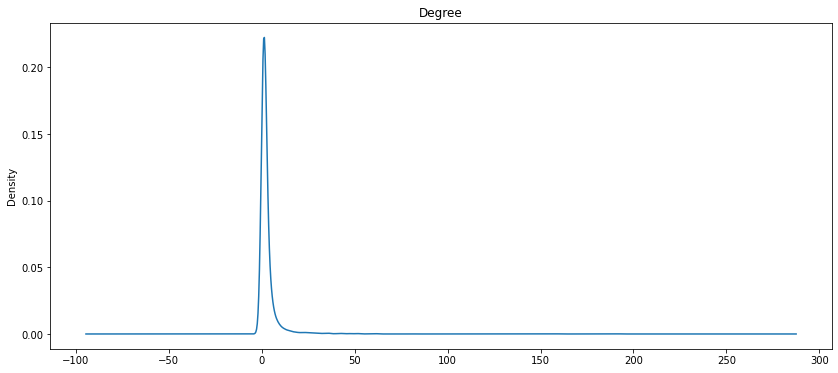

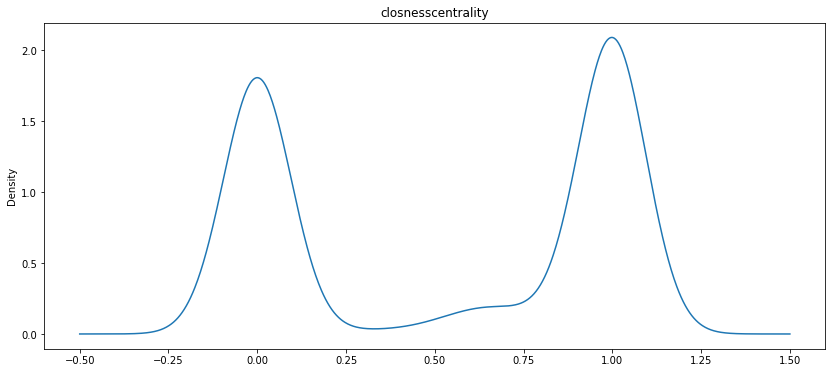

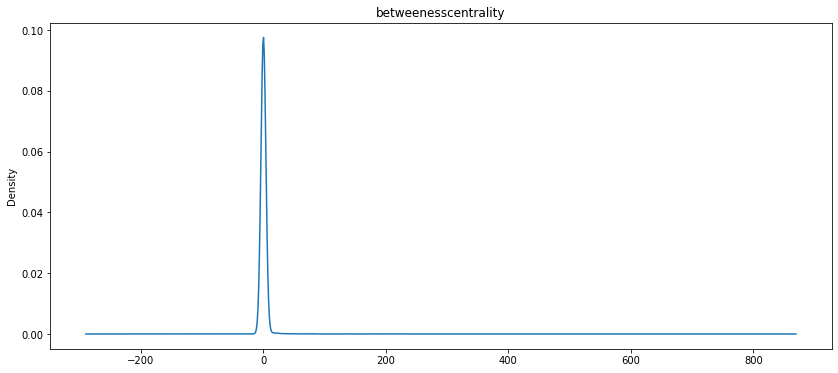

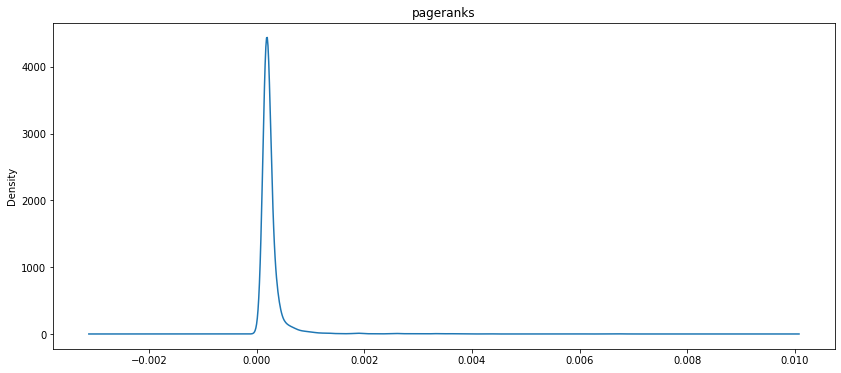

In [25]:
for f in network:
    plt.figure(figsize=(14,6))
    network[f].plot(kind='kde', title=f)
    plt.show()